# Part C: Multivariate Linear Regression with Feature Engineering
<hr>

> ### Description

- Experiment on multivariate linear regression with feature engineering or with any algorithms of your choice.


 # Importing the Libraries into a Dataframe

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import altair as alt

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

# Hide warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data into a dataframe called cancer_df.

cancer_train_df = pd.read_csv('https://raw.githubusercontent.com/modernth3ory/Cancer-Dataset/main/cancer_us_county-training.csv')
cancer_test_df = pd.read_csv('https://raw.githubusercontent.com/modernth3ory/Cancer-Dataset/main/cancer_us_county-training.csv')


In [3]:
# Concatenate the two dataframes into one.

cancer_df = pd.concat([cancer_train_df, cancer_test_df], ignore_index=True)


<br>
<br>
<br>
<br>
<br>
<br>
<br>

 # Exploring the Dataset


In [4]:
# Display the first 5 rows of the dataset.

cancer_df.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4


In [5]:
# Display the last 5 rows of the dataset.

cancer_df.tail()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
4871,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
4872,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
4873,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
4874,1962.667684,23,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045
4875,219.000000,89,179.7,449.100000,40801,37585,17.2,0.000000,"(40362.7, 42724.4]",42.9,...,37.5,39.4,21.8,91.393432,3.381528,0.055305,3.149772,49.892641,6.549178,3046


In [6]:
# Display the number of rows and columns in the dataset.

cancer_df.shape


(4876, 35)

In [7]:
# Display the Data Types of the dataset.

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4876 entries, 0 to 4875
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              4876 non-null   float64
 1   avgDeathsPerYear         4876 non-null   int64  
 2   TARGET_deathRate         4876 non-null   float64
 3   incidenceRate            4876 non-null   float64
 4   medIncome                4876 non-null   int64  
 5   popEst2015               4876 non-null   int64  
 6   povertyPercent           4876 non-null   float64
 7   studyPerCap              4876 non-null   float64
 8   binnedInc                4876 non-null   object 
 9   MedianAge                4876 non-null   float64
 10  MedianAgeMale            4876 non-null   float64
 11  MedianAgeFemale          4876 non-null   float64
 12  Geography                4876 non-null   object 
 13  AvgHouseholdSize         4876 non-null   float64
 14  PercentMarried          

In [8]:
# Display a description of the dataset.

cancer_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4.876000e+03,4876.000000,4876.000000,4876.000000,4876.000000,...,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.321073,438.428170,27.535627,53.242406,11918.164058,2.744990e+05,6.387743,563.756000,45.048552,5.217111,...,9.365472,7.822545,6.093458,16.274293,14.360429,2.557848,3.541335,6.500587,1.966055,874.815934
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38871.000000,1.154300e+04,12.100000,0.000000,37.800000,36.400000,...,34.600000,30.900000,15.000000,77.339000,0.634382,0.246832,0.288746,47.826087,4.516129,775.000000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,522.000000,151.000000,195.300000,482.000000,52493.000000,6.964800e+04,20.400000,92.591080,44.100000,42.500000,...,47.600000,41.500000,23.100000,95.465300,10.463576,1.207631,2.107185,55.333729,6.458604,2280.000000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


> ##### Insights

- The dataset contains 34 columns.

- Dataset contains both categorical and numerical variables, with NaN values in three columns.

<br>

- There columns containing object variables are: [ "Geography", "binnedInc" ]. 

- The other columns consist of int64 or float64 variables.


<br>
<br>
<br>
<br>
<br>
<br>
<br>

 # Data Cleaning


##### Identifying and Amending NaN values

In [9]:
# Display the missing values in the dataset.

cancer_df.isnull().sum()


avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            3652
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          244
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone    1000
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

<AxesSubplot:>

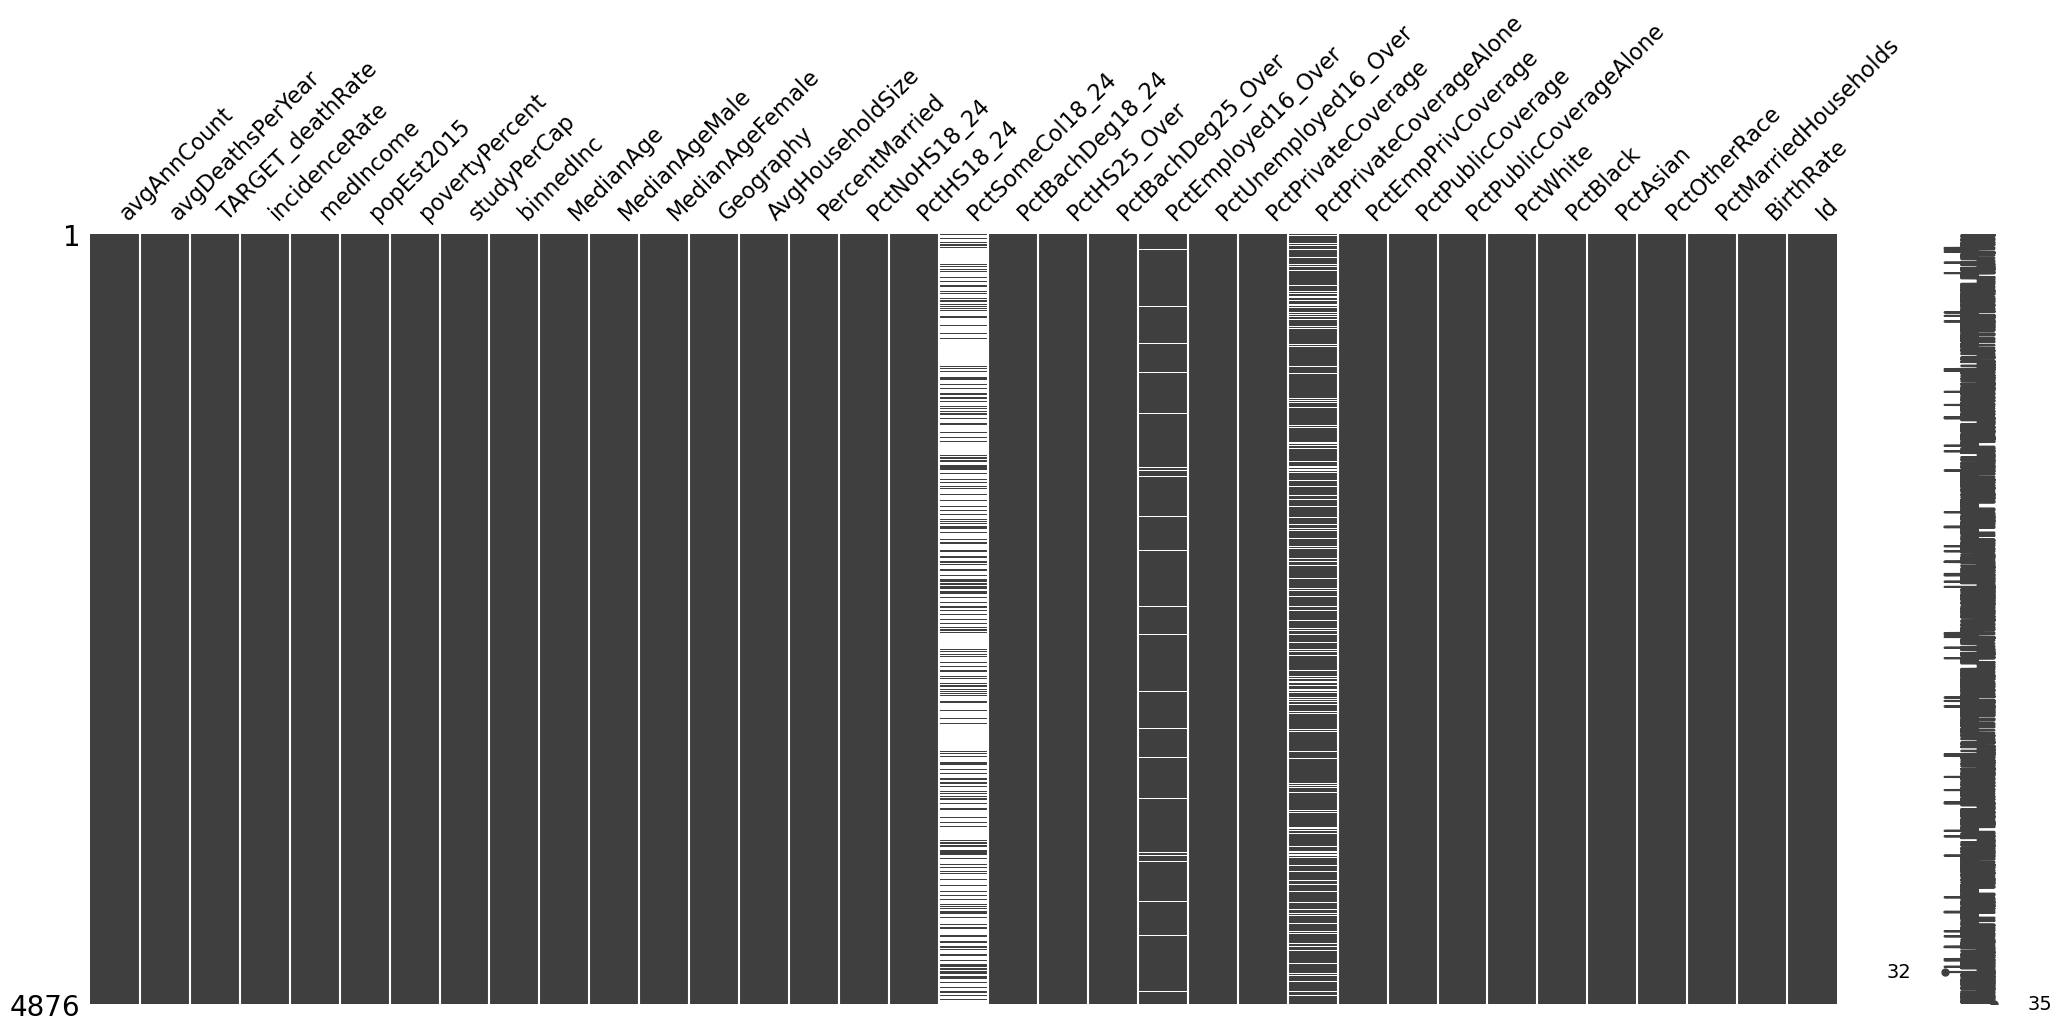

In [10]:
# Visualise the missing values with missingno.

msno.matrix(cancer_df)


In [11]:
# Drop "PctSomeCol18_24", as the majority of values are NaN.

cancer_df.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)

In [12]:
# Fill NaN values with the mean of the column for PctPrivateCoverage, PctEmployed16_Over.

cancer_df['PctPrivateCoverageAlone'].fillna(cancer_df['PctPrivateCoverageAlone'].mean(), inplace=True)
cancer_df['PctEmployed16_Over'].fillna(cancer_df['PctEmployed16_Over'].mean(), inplace=True)

> ##### Insights

Three columns contain NaN values: 

- "PctSomeCol18_24"

- "PctEmployed16_Over"

- "PctPrivateCoverageAlone"

<br>

- The column "PctSomeCol18_24" was dropped from the dataset, as it contains most NaN values.

- The columns "PctEmployed16_Over" and "PctPrivateCoverageAlone" were filled with the mean of the column.

- While "PctPrivateCoverageAlone" had 1/5ths of its values missing, the distribution (performed in subsequent section), suggested that the mean was a good choice for filling the NaN values.

<br>


<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Identifying Duplicate Rows

In [13]:
# Determine whether the data contains any duplicate entries.

cancer_df.duplicated().sum()


2438

> ##### Insights

- There are no duplicate rows in the dataset.

<br>


<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Investigating Object Values

In [14]:
# Check the amount of values for each column with the object data type.

for i in cancer_df.select_dtypes(include=object):
    print(cancer_df[i].value_counts(ascending=True))

[22640, 34218.1]      470
(51046.4, 54545.6]    472
(42724.4, 45201]      476
(61494.5, 125635]     480
(48021.6, 51046.4]    480
(37413.8, 40362.7]    484
(45201, 48021.6]      498
(54545.6, 61494.5]    504
(34218.1, 37413.8]    504
(40362.7, 42724.4]    508
Name: binnedInc, dtype: int64
Jackson County, Kentucky         2
Morris County, Texas             2
Dallas County, Arkansas          2
Berrien County, Michigan         2
New Castle County, Delaware      2
                                ..
Emmons County, North Dakota      2
Monroe County, New York          2
Hall County, Nebraska            2
Madison County, Georgia          2
Yadkin County, North Carolina    2
Name: Geography, Length: 2438, dtype: int64


<AxesSubplot:title={'center':'US State Locations of Data Origin.'}>

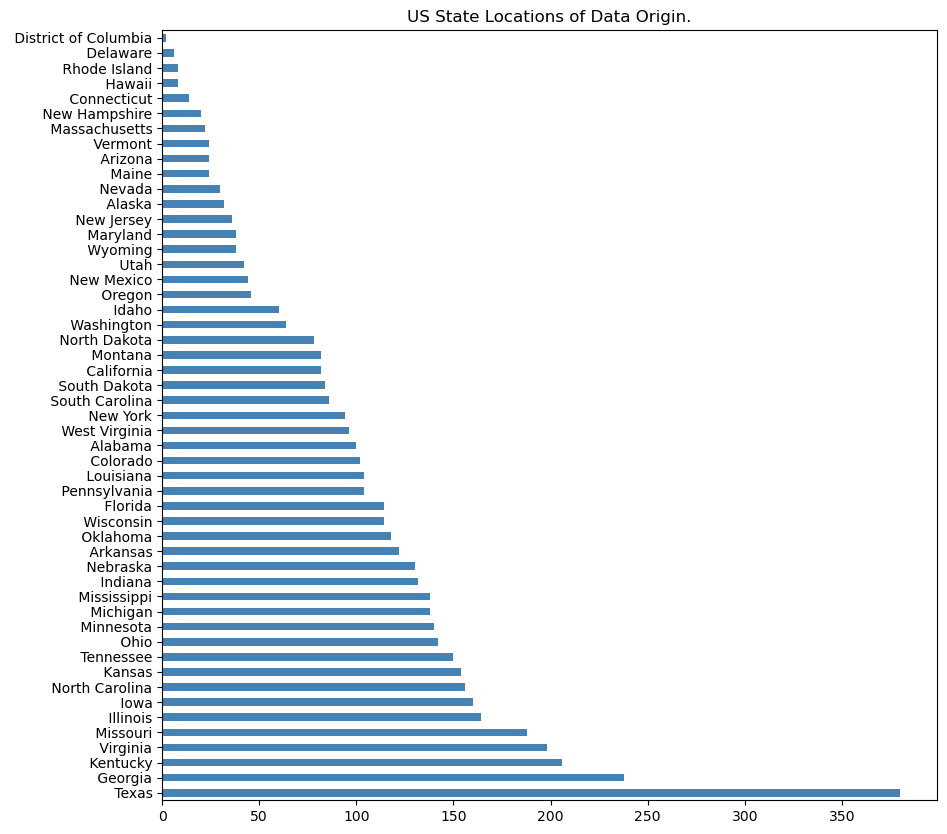

In [15]:
# Count the most frequent words in the column "Geography", after the ",".

from collections import Counter

cancer_df['Geography'].str.split(',').apply(lambda x: Counter(x[1:]).most_common(1)[0][0]).value_counts().plot(kind='barh',figsize=(10,10), title='US State Locations of Data Origin.', color='steelblue')


In [16]:
# Move Geography to the last column.

cancer_df = cancer_df[[c for c in cancer_df if c not in ['Geography']] + ['Geography']]


In [17]:
# Drop the "binnedInc" column.

cancer_df.drop(columns=['binnedInc'],axis=1,inplace=True)

> ##### Insights

- The "Geography" column contains a large spread of values from varying states in the US. This may provide some application toward discerning cancer incidence down the track.

- It is difficult to convert the "Geography" column into numerical values, as it's quite diverse.

<br>

- The "binnedInc" column represents (Median income per capita binned by decile), a value already represented by Medianincome. As it is incomplete, it is not a useful feature for the model.

- The "binnedInc" column was dropped from the dataset.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Visualising and Amending Outliers for the Univariate Linear Regression Model

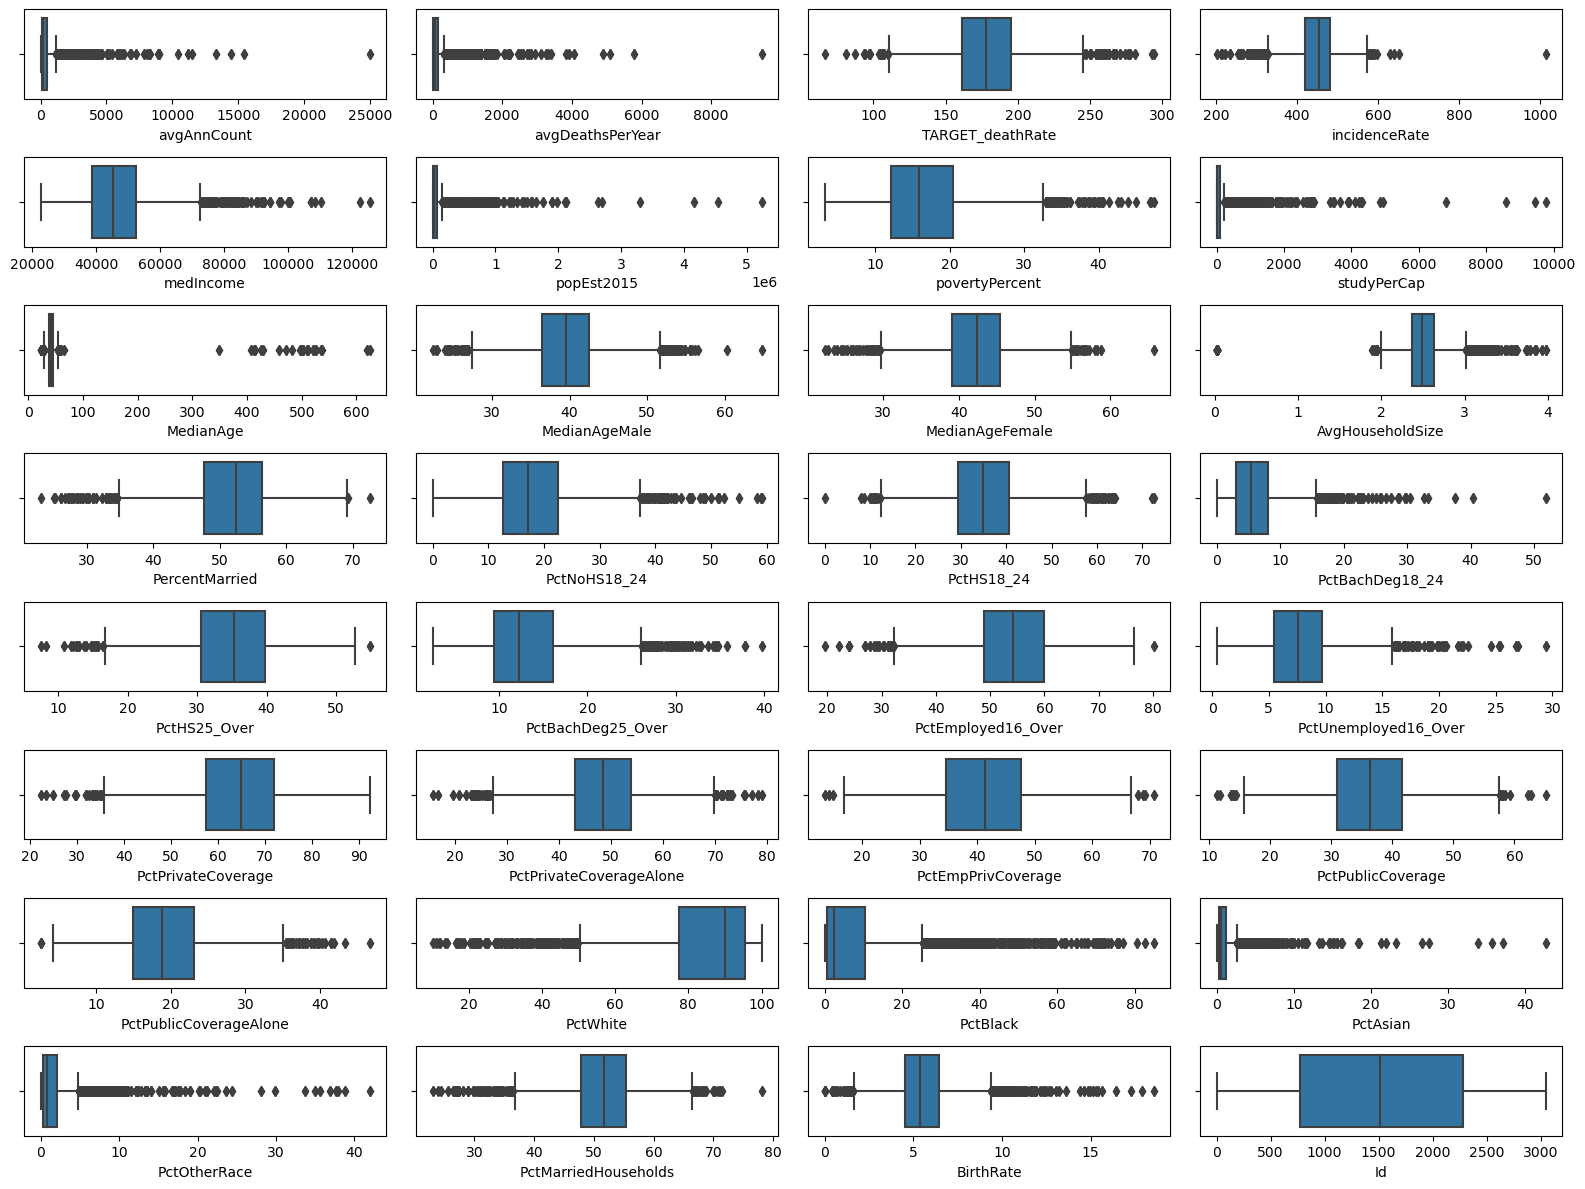

In [18]:
# Visualise the outliers in the data through boxplots.

fig, axes = plt.subplots(8, 4, figsize=(16, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_df.columns[:-1]):
  plot = sns.boxplot(data=cancer_df, x=c, ax=axes[i])
plt.tight_layout()


##### Visualising the Impact of Outliers on the Univariate Linear Regression Model

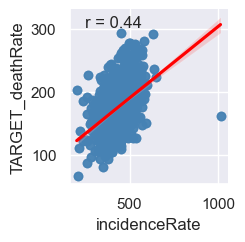

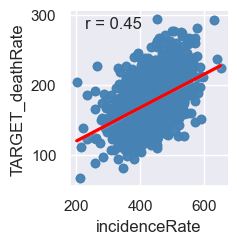

In [19]:
# Compare incidenceRate to the target variable with and without the outlier.
# Create scatter plots of TARGET_deathrate vs incidenceRate.

from scipy import stats

def regplot_with_corr(x, y, **kwargs):
    ax = sns.regplot(x=x, y=y, **kwargs)
    r, _ = stats.pearsonr(x, y)
    ax.annotate(f'r = {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes)


sns.set()
cols = ['incidenceRate']
g = sns.PairGrid(cancer_df, y_vars=['TARGET_deathRate'], x_vars=cols, height=2.5)
g.map(regplot_with_corr, color='steelblue', line_kws={'color': 'red'})
plt.show()

# Remove the row from the dataset with an incidenceRate of 1000.

cancer_df_incidenceRate_no_out = cancer_df[cancer_df['incidenceRate'] < 1000]

# Create scatter plots of TARGET_deathrate vs incidenceRate with the outlier removed.

sns.set()
cols = ['incidenceRate']
g = sns.PairGrid(cancer_df_incidenceRate_no_out, y_vars=['TARGET_deathRate'], x_vars=cols, height=2.5)
g.map(regplot_with_corr, color='steelblue', line_kws={'color': 'red'})
plt.show()

> ##### Insights

- While the 1000 count incident outlier affects the correlation coefficient, it must be left in, as it represents a real-world scenario.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Removing Outliers

In [20]:
# Remove all outliers from average deaths per year.

cancer_df = cancer_df[cancer_df['MedianAge'] < 300]




> ##### Insights

- On the other hand, median age outliers >300 must be removed, as they are not a representative of the real-world scenario.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Define Dataframe as Cleaned

In [21]:
# Display the new shape of the dataset.

cancer_df.shape

(4828, 33)

In [22]:
# Define new dataframe as cleaned data.

cancer_df_clean = cancer_df


> ### Insights

- As all columns, except "Geography", are numerical, the dataset is ready for analysis.

- Be mindful some missing values are remain in PctEmployed16_Over, and PctPrivateCoverage.

- These will be addressed when exploring outliers.

<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>

 # Data Analysis


##### Visualising Distribution

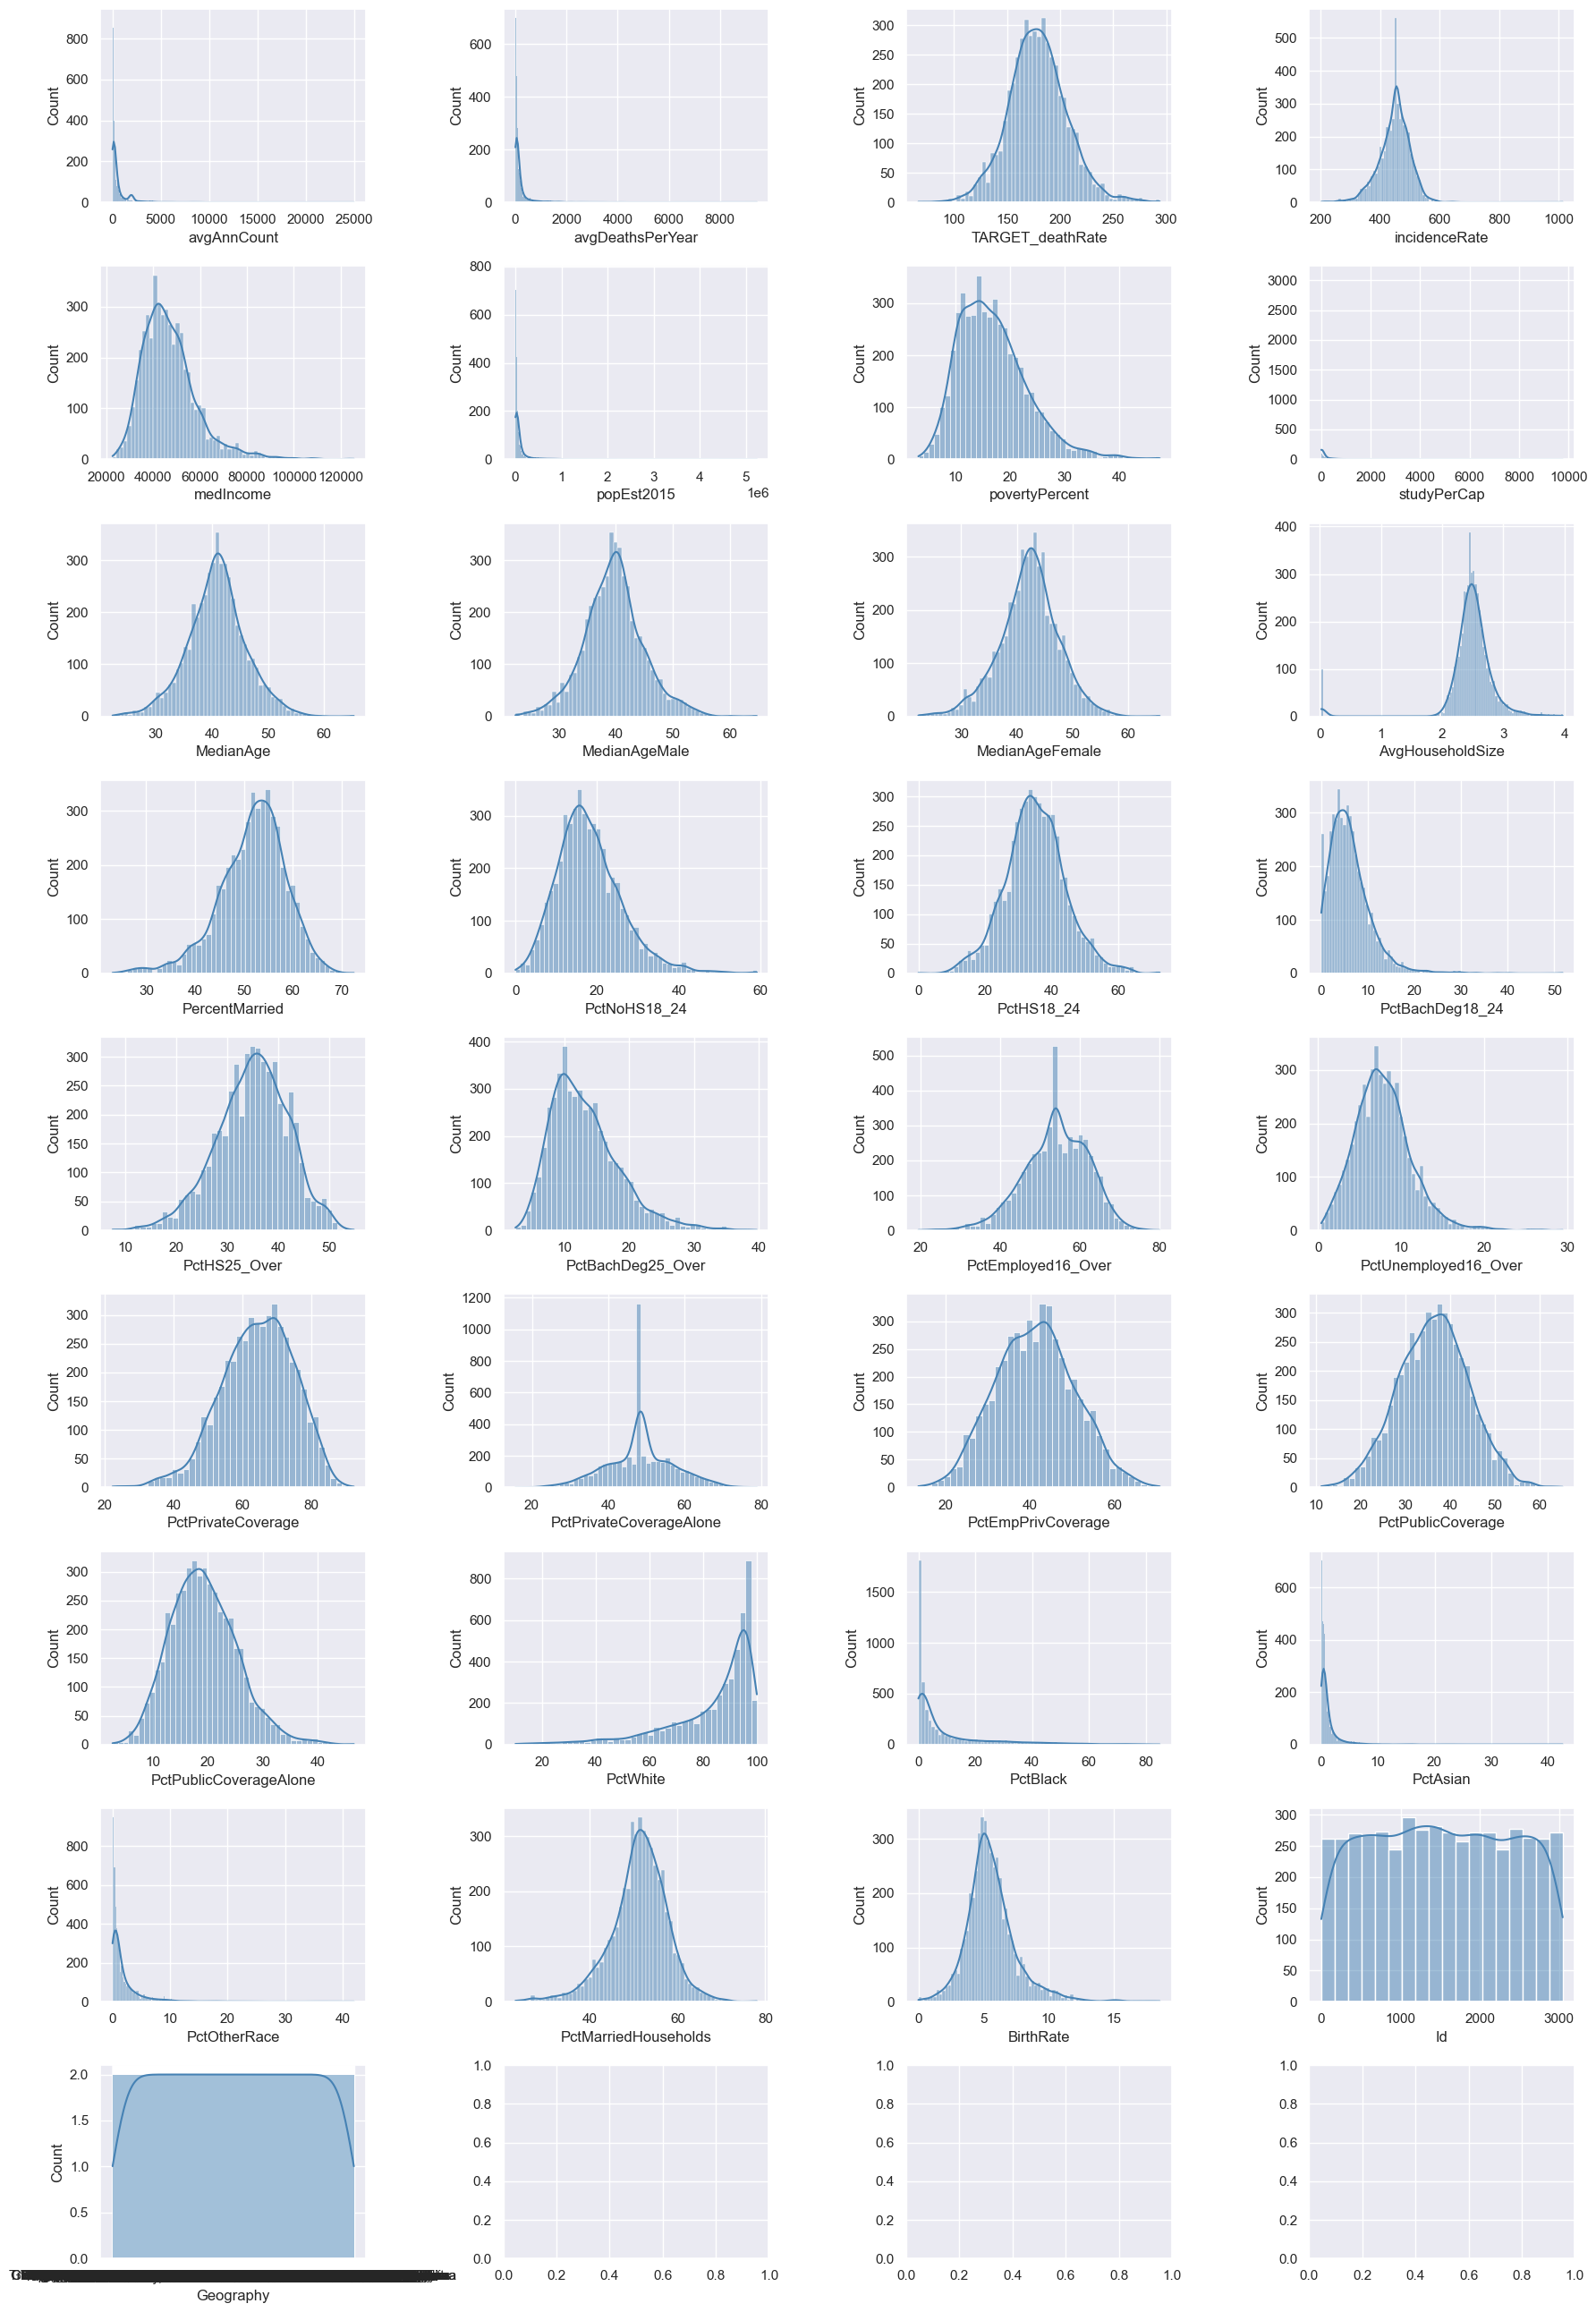

In [23]:
# Visualising distribution of data to determine features to use for a linear regression model without geography and ID.
# "Geography" and "ID" will not be usable distributions.

fig, axes = plt.subplots(9, 4, figsize=(18, 26))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_df_clean.columns):
    plot = sns.histplot(cancer_df_clean[c], ax=axes[i], kde = True, color = 'steelblue')
plt.tight_layout()


> ### Insights

Normal Distributions:

- Target_deathrate

- incidenceRate

- MedianAgeMale

- MedianAgeFemale

- PctHS18_24

- PctPrivate CoverageAlone

- PctEmpPrivCoverage

- PctPublicCoverage

- PctMarriedHouseholds


<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Discerning Correlation between features and the Target Variable (Target_deathrate)

<AxesSubplot:>

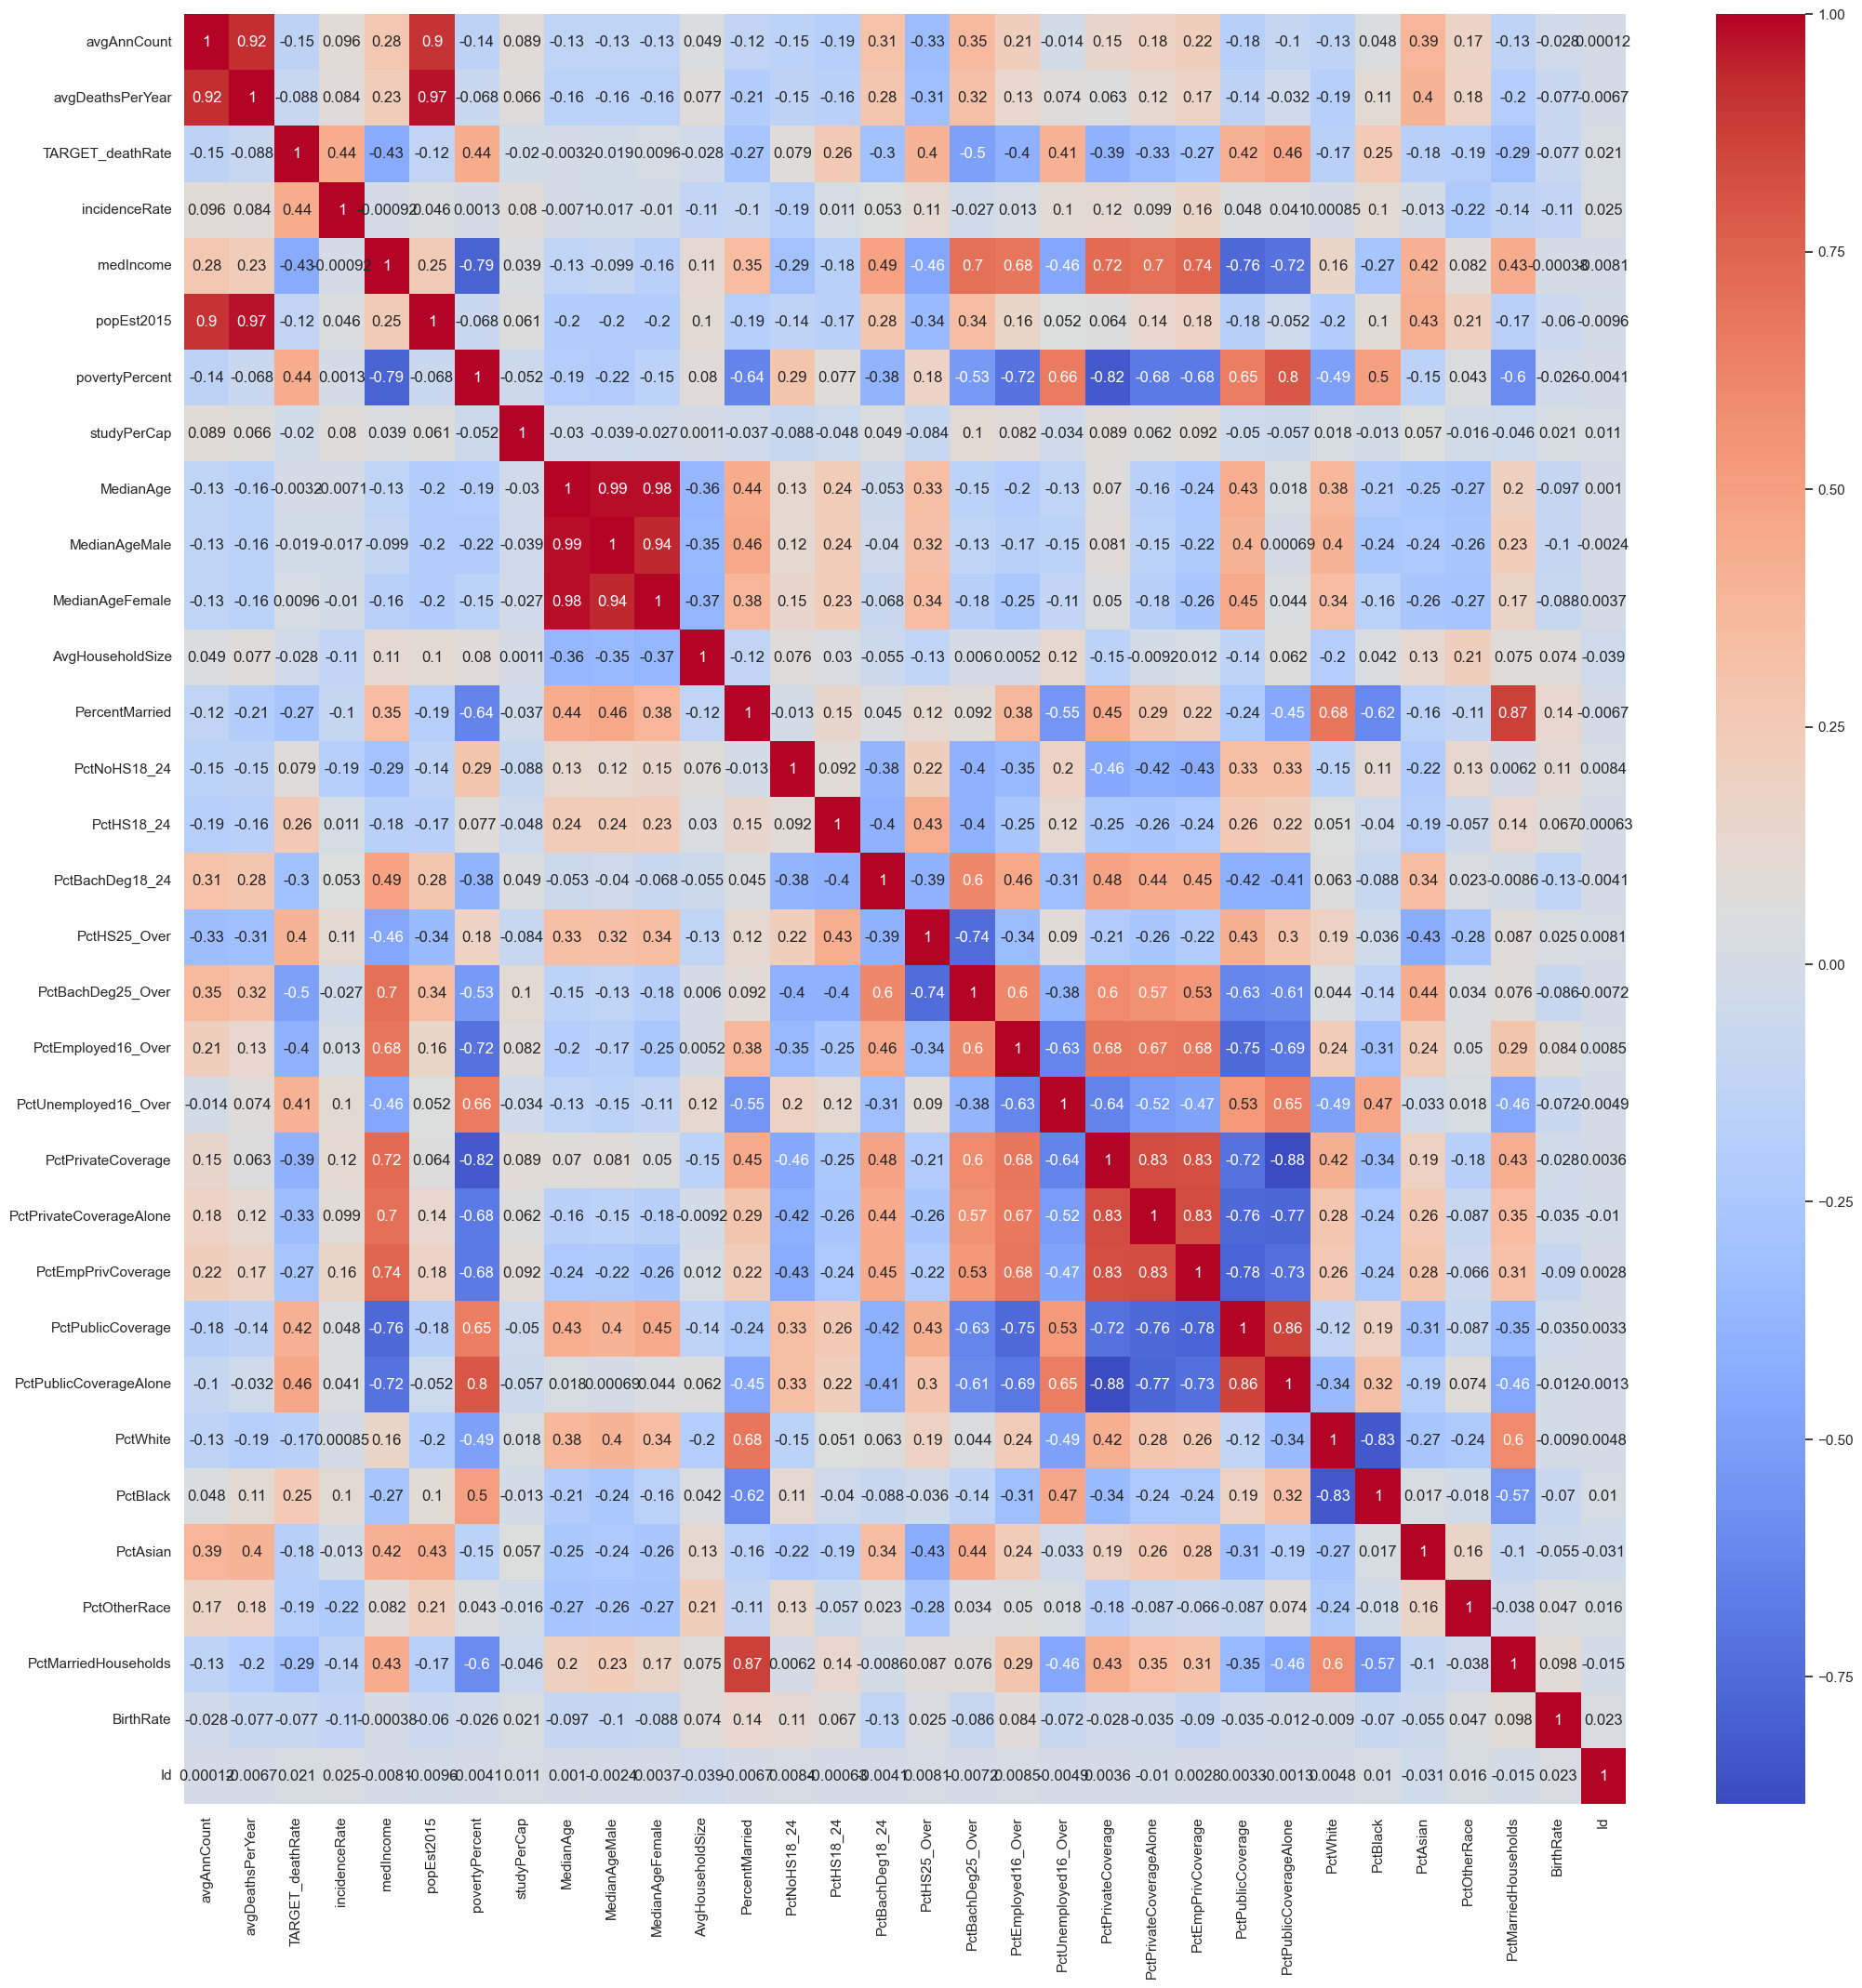

In [24]:
# Visualise correlation between the features using a heatmap.

plt.figure(figsize=(25,25))
sns.heatmap(cancer_df_clean.corr(), annot=True, cmap='coolwarm')

In [25]:
# Display the correlation between the features and the target variable.

cancer_df_clean.corr()['TARGET_deathRate'].sort_values(ascending=False)


TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.463189
povertyPercent             0.437678
incidenceRate              0.436983
PctPublicCoverage          0.415472
PctUnemployed16_Over       0.406530
PctHS25_Over               0.403450
PctHS18_24                 0.263929
PctBlack                   0.251927
PctNoHS18_24               0.078585
Id                         0.021099
MedianAgeFemale            0.009630
MedianAge                 -0.003220
MedianAgeMale             -0.018609
studyPerCap               -0.019891
AvgHouseholdSize          -0.027757
BirthRate                 -0.077268
avgDeathsPerYear          -0.088457
popEst2015                -0.123278
avgAnnCount               -0.147444
PctWhite                  -0.172409
PctAsian                  -0.178995
PctOtherRace              -0.185341
PercentMarried            -0.266066
PctEmpPrivCoverage        -0.270133
PctMarriedHouseholds      -0.291291
PctBachDeg18_24           -0.295475
PctPrivateCoverageAlone   -0

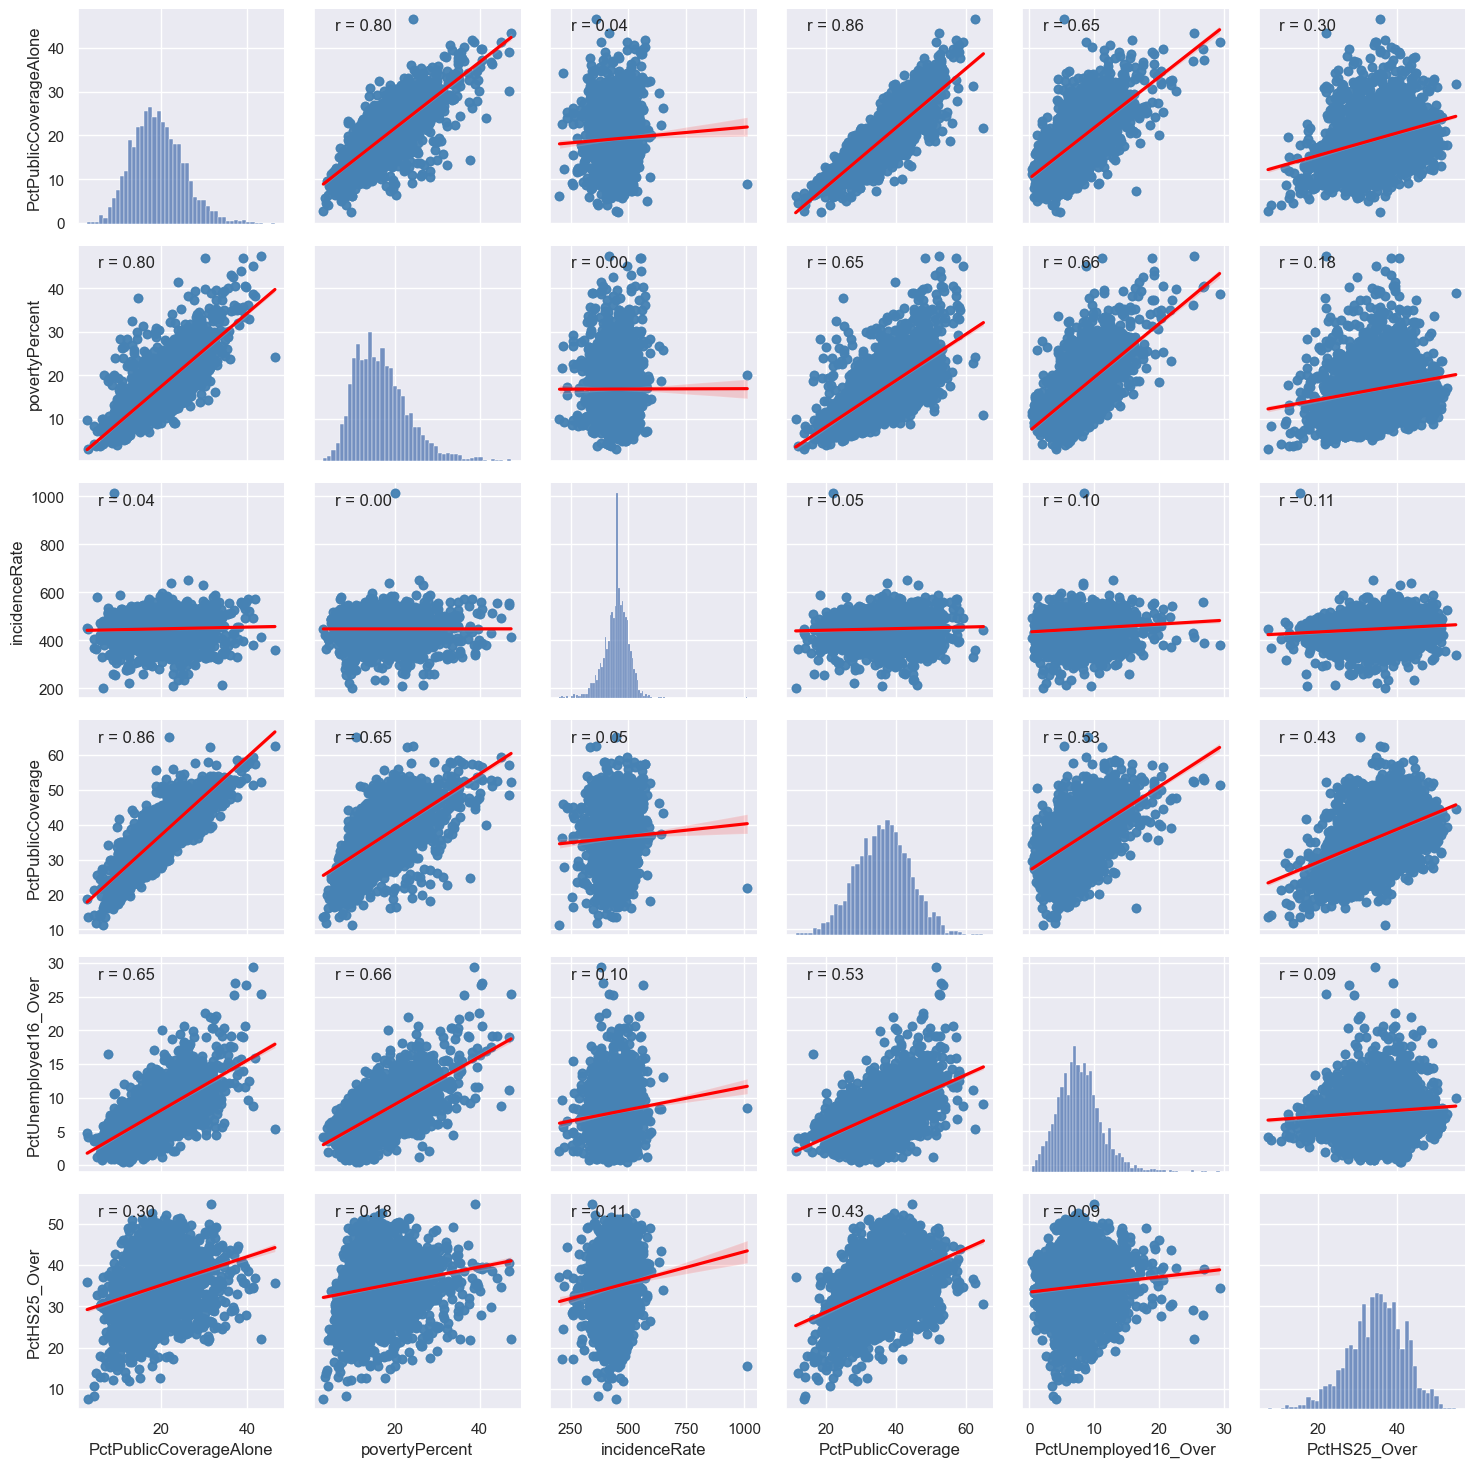

In [26]:
# Taking the top 6 features with the highest correlation with the target variable, and visualising the their relationships.

sns.set()
cols = ['PctPublicCoverageAlone', 'povertyPercent', 'incidenceRate', 'PctPublicCoverage', 'PctUnemployed16_Over', 'PctHS25_Over']
g = sns.PairGrid(cancer_df_clean[cols], size=2.5)
g.map_diag(sns.histplot)
g.map_offdiag(regplot_with_corr, color='steelblue', line_kws={'color': 'red'})
plt.show()

> ### Insights

Most Positively correlated features between the target variable and the other features:

- PctPublicCoverageAlone

- povertyPercent

- incidenceRate

- PctPublicCoverage

- PctUnemployed16_Over

- PctHS25_Over

<br>

Most negatively correlated features between the target variable and the other features:

- PctBachDeg25_Over

- medIncome

- PctEmployed16_Over

- PctPrivateCoverage





<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>

##### Visualising Positively and Negatively Correlated Features of the Target Variable

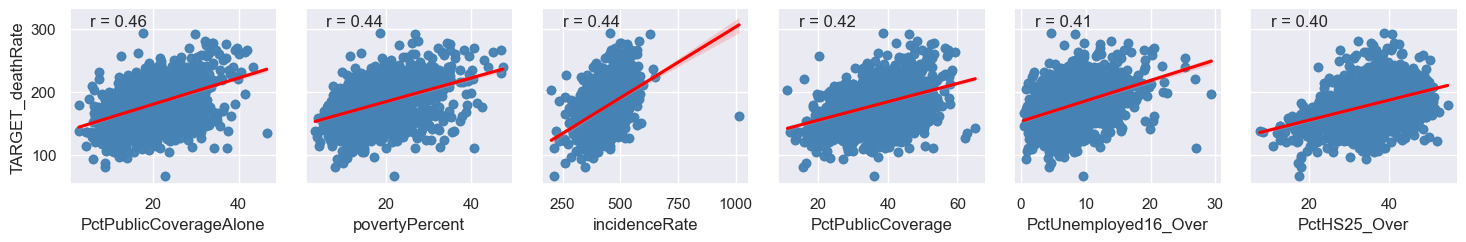

,TARGET_deathRate,PctPublicCoverageAlone,povertyPercent,incidenceRate,PctPublicCoverage,PctUnemployed16_Over,PctHS25_Over
0,261.0,32.9,26.8,561.400000,47.5,12.3,43.4
1,167.3,34.1,38.8,345.600000,45.3,11.5,35.5
2,191.0,16.0,15.5,468.400000,34.5,10.6,43.5
3,165.4,15.2,11.1,453.549422,30.1,5.8,32.5
4,160.6,24.5,35.3,349.700000,45.1,14.6,40.6


In [27]:
# Create scatter plots for the most correlated features with the target variable.
# Create scatter plots of TARGET_deathrate vs PctPublicCoverageAlone, povertyPercent,incidenceRate, PctPublicCoverage, PctUnemployed16_Over, PctHS25_Over.

sns.set()
cols = ['PctPublicCoverageAlone', 'povertyPercent', 'incidenceRate', 'PctPublicCoverage', 'PctUnemployed16_Over', 'PctHS25_Over']
g = sns.PairGrid(cancer_df_clean, y_vars=['TARGET_deathRate'], x_vars=cols, height=2.5)
g.map(regplot_with_corr, color='steelblue', line_kws={'color': 'red'})
plt.show()

# Create a new dataframe with the features that have a correlation of 0.5 or greater with the target variable.

cancer_df_clean_pos_cor = cancer_df_clean[['TARGET_deathRate','PctPublicCoverageAlone','povertyPercent','incidenceRate','PctPublicCoverage','PctUnemployed16_Over','PctHS25_Over']]
cancer_df_clean_pos_cor.head()



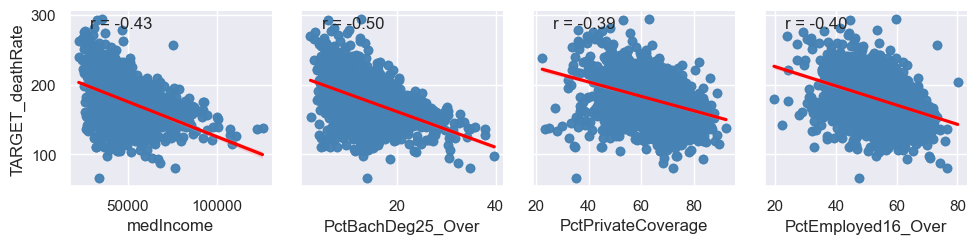

,TARGET_deathRate,PctPrivateCoverage,PctEmployed16_Over,medIncome,PctBachDeg25_Over
0,261.0,44.8,37.3,29090,4.3
1,167.3,27.2,31.7,29782,6.4
2,191.0,67.4,48.5,41955,10.2
3,165.4,70.9,57.1,55378,10.6
4,160.6,54.8,28.6,26309,5.9


In [28]:
# Create scatter plots for the negatively correlated features with the target variable.
# Create scatter plots of TARGET_deathrate vs PctPrivateCoverage, PctEmployed16_Over, medIncome, PctBachDeg25_Over.

sns.set()
cols = ['medIncome','PctBachDeg25_Over','PctPrivateCoverage','PctEmployed16_Over']
g = sns.PairGrid(cancer_df_clean, y_vars=['TARGET_deathRate'], x_vars=cols, height=2.5)
g.map(regplot_with_corr, color='steelblue', line_kws={'color': 'red'})
plt.show()

# Create a new dataframe with the features that have a correlation of -0.5 or less with the target variable.

cancer_df_clean_neg_cor = cancer_df_clean[['TARGET_deathRate','PctPrivateCoverage','PctEmployed16_Over','medIncome','PctBachDeg25_Over']]
cancer_df_clean_neg_cor.head()


> ### Insights

Key relationships worth acknowledging (all relationships share a ~0.4 correlation, so none are definitive):

- The higher covered by public health insurance alone, the higher the target death rate.

- The higher the poverty percentage, the higher the target death rate.

- The higher the unemployment rate (over 16), the higher the target death rate.

- The higher the median income, the lower the target death rate.

- The higher degree of education, the lower the target death rate.

- The more private health insurance coverage, the lower the target death rate.

<br>

- Incidence Rate is a good feature to use for the model, as it has a stronger positive correlation with the target variable.

- Poverty Percentage, is also a good feature to use for the model, as it has a stronger positive correlation with the target variable.

<br>
<br>
<br>
<br>
<br>

# Modelling-  Multivariate Linear Regression with Feature Engineering

In [29]:
# Create a new dataframe called cancer_df_numeric.

cancer_df_features = cancer_df_clean
cancer_df_features.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id,Geography
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0,"Jackson County, Kentucky"
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1,"Willacy County, Texas"
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2,"Henry County, Indiana"
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3,"Morton County, Kansas"
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4,"Hancock County, Georgia"


##### Feature Engineering: "Geography"

<AxesSubplot:title={'center':'US State Locations of Data Origin.'}>

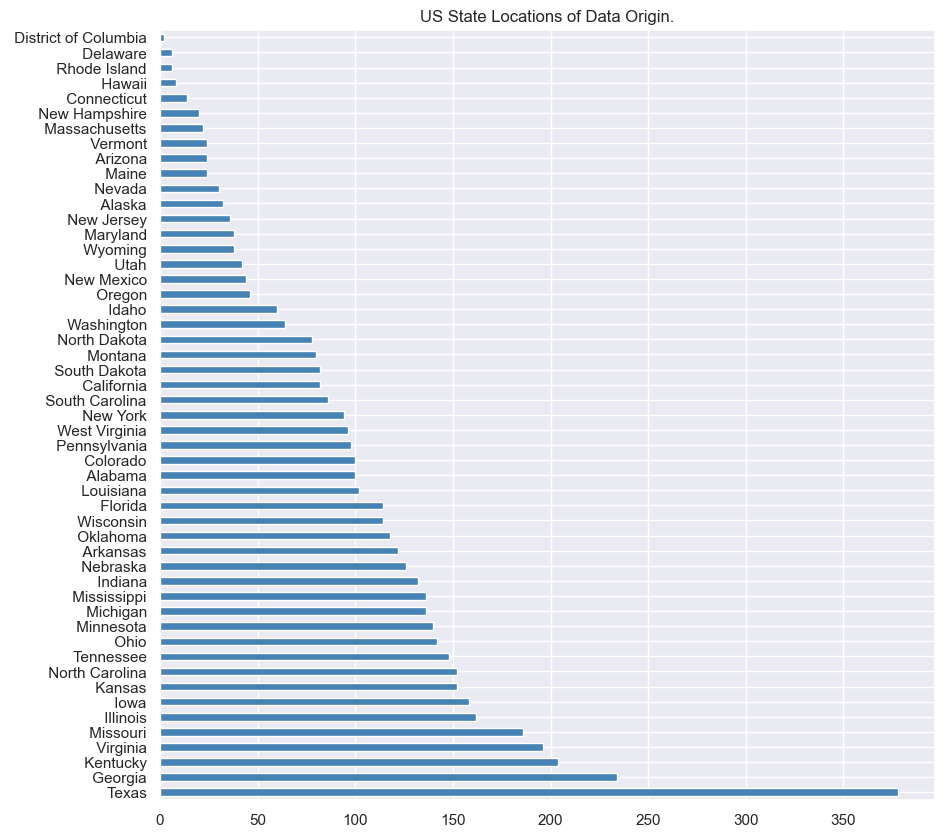

In [30]:
# Sort the dataframe by location.
# Count the most frequent words in the column "Geography", after the ",".

cancer_df_features['Geography'].str.split(',').apply(lambda x: Counter(x[1:]).most_common(1)[0][0]).value_counts().plot(kind='barh',figsize=(10,10), title='US State Locations of Data Origin.', color='steelblue')


In [31]:
# Convert the column "Geography" into numerical values through one-hot encoding.

cancer_df_features['Geography'] = cancer_df_features['Geography'].str.split(',').apply(lambda x: Counter(x[1:]).most_common(1)[0][0])
cancer_df_features = pd.get_dummies(cancer_df_features, columns=['Geography'])
cancer_df_features.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,Geography_ South Dakota,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,0,0,0,0,0,0,0,0,0,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,0,0,1,0,0,0,0,0,0,0
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,0,0,0,0,0,0,0,0,0,0
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,0,0,0,0,0,0,0,0,0,0
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Drop the ID column.

cancer_df_features_numeric = cancer_df_features.drop(['Id'], axis=1)
cancer_df_features_numeric.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,Geography_ South Dakota,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,0,0,0,0,0,0,0,0,0,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,0,0,1,0,0,0,0,0,0,0
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,0,0,0,0,0,0,0,0,0,0
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,0,0,0,0,0,0,0,0,0,0
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,0,0,0,0,0,0,0,0,0,0


##### Feature Engineering: "Higher Tertiary Education"

In [33]:
# Create a new column called "Higher Education" which combines the columns "PctBachDeg18_24" and "PctBachDeg25_Over".

cancer_df_features['Higher Education'] = cancer_df_features['PctBachDeg18_24'] + cancer_df_features['PctBachDeg25_Over']
cancer_df_features.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,Geography_ Tennessee,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming,Higher Education
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,0,0,0,0,0,0,0,0,0,7.8
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,0,1,0,0,0,0,0,0,0,6.9
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,0,0,0,0,0,0,0,0,0,16.6
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,0,0,0,0,0,0,0,0,0,16.8
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,0,0,0,0,0,0,0,0,0,9.9


##### Feature Engineering: "Non-caucasian Descent" Population

In [34]:
# Create a new column called "Non-white" which combines the columns "PctBlack", "PctAsian", "PctOtherRace".

cancer_df_features['Non-white'] = cancer_df_features['PctBlack'] + cancer_df_features['PctAsian'] + cancer_df_features['PctOtherRace']
cancer_df_features.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,Geography_ Texas,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming,Higher Education,Non-white
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,0,0,0,0,0,0,0,0,7.8,0.044920
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,1,0,0,0,0,0,0,0,6.9,4.567767
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,0,0,0,0,0,0,0,0,16.6,2.563790
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,0,0,0,0,0,0,0,0,16.8,8.338699
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,0,0,0,0,0,0,0,0,9.9,75.014075


##### Feature Engineering: "Male-Female Median Age Gap"

In [35]:
# Create a new column which subtracts the mean of the "MedianAgeMale" column from the mean "MedianAgeFemale" column.

cancer_df_features['MedianAgeDiff'] = cancer_df_features['MedianAgeMale'] - cancer_df_features['MedianAgeFemale']
cancer_df_features.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,Geography_ Utah,Geography_ Vermont,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming,Higher Education,Non-white,MedianAgeDiff
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,0,0,0,0,0,0,0,7.8,0.044920,-1.3
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,0,0,0,0,0,0,0,6.9,4.567767,-4.4
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,0,0,0,0,0,0,0,16.6,2.563790,-2.9
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,0,0,0,0,0,0,0,16.8,8.338699,-8.0
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,0,0,0,0,0,0,0,9.9,75.014075,-6.6


##### Feature Engineering: "Percentage Insured"

In [36]:
# Create a new column called "Insured" which totals the columns "PctPrivateCoverageAlone", "PctPublicCoverageAlone".

cancer_df_features['Insured'] = cancer_df_features['PctPrivateCoverageAlone'] + cancer_df_features['PctPublicCoverageAlone']
cancer_df_features.head()

# Create a new column called "Uninsured" which subtracts "Insured" from 100.

cancer_df_features['Uninsured'] = 100 - cancer_df_features['Insured']
cancer_df_features.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,Geography_ Virginia,Geography_ Washington,Geography_ West Virginia,Geography_ Wisconsin,Geography_ Wyoming,Higher Education,Non-white,MedianAgeDiff,Insured,Uninsured
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,39.8,39.2,...,0,0,0,0,0,7.8,0.044920,-1.3,66.5,33.5
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,32.3,30.8,...,0,0,0,0,0,6.9,4.567767,-4.4,54.8,45.2
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,42.2,40.9,...,0,0,0,0,0,16.6,2.563790,-2.9,65.6,34.4
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,41.6,38.3,...,0,0,0,0,0,16.8,8.338699,-8.0,72.0,28.0
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,43.9,41.2,...,0,0,0,0,0,9.9,75.014075,-6.6,62.3,37.7


##### Repeat Multivariate Linear Regression Model with new Features

In [37]:
# Extract the target variable from the dataframe and save it into a variable called y.

y = cancer_df_features.pop('TARGET_deathRate')

# Save the features into a variable called X.

X = cancer_df_features

# Split the data into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assess the baseline model.

# Find the average value of the target variable and save it into a variable called y_mean.

y_mean = y_train.mean()

# Create a numpy array called y_base filled with this value.

y_base = np.full(y_train.shape, y_mean)

# Import the mean_squared_error and mean_absolute_error functions from sklearn.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the MSE and MAE between the target variable and the average value.

print("Mean Squared Error:", mean_squared_error(y_train, y_base, squared=True))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_base))


Mean Squared Error: 742.3716002480448
Mean Absolute Error: 21.217982863476635


In [38]:
# Describe the cancer_df_features dataframe.

y_train.describe()


count    3862.000000
mean      178.546996
std        27.250025
min        66.300000
25%       161.300000
50%       178.050000
75%       195.200000
max       280.800000
Name: TARGET_deathRate, dtype: float64

##### Insights

- The MAE is close to one standard deviation.

- The MSE value of 742.37 indicates that the average squared error is higher than the MAE, which means that the model has some larger errors that are contributing more to the overall error.

- Therefore the model is not very accurate and engineering new features did not improve thhe outcome.


In [39]:
# Train the model.

# Import the linear regression module from sklearn.

from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression class into a variable called reg.

reg = LinearRegression()

# Fit the model with the training data.

reg.fit(X_train, y_train)

# Use the trained model to predict the outcome for X_train and save them into a variable called y_preds.

y_preds = reg.predict(X_test)

# Calculate the MSE and MAE between the target variable and the predictions.
# Print the mean and standard deviation of the scores.

print("\n")
print("Mean Squared Error:", mean_squared_error(y_test, y_preds, squared=True))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))

# Perform cross validation on the training data.

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation on the training data.

scores = cross_val_score(reg, X_train, y_train, cv=5)

print("\n")
print("Cross Validation Scores:", scores)
print("Cross Validation Mean:", scores.mean())
print("Cross Validation Standard Deviation:", scores.std())



Mean Squared Error: 378.3021422884047
Mean Absolute Error: 13.670669129146667


Cross Validation Scores: [0.54229774 0.60653486 0.57230545 0.58454632 0.57932275]
Cross Validation Mean: 0.5770014235850913
Cross Validation Standard Deviation: 0.020789110361778836


##### Insights

- The MAE is close to half a standard deviation.

- While he MSE value of 378 is high, it is an overall improvement.

- The model is still not very accurate.


##### Lasso Regression

In [40]:
# Perform Lasso Regression.
# Import the Lasso module from sklearn.

from sklearn.linear_model import Lasso

# Instantiate the Lasso class into a variable called lasso.

lasso = Lasso()

# Fit the model with the training data.

lasso.fit(X_train, y_train)


# Use the trained model to predict the outcome for X_train and save them into a variable called y_preds.

y_preds = lasso.predict(X_test)

# Perform 5-fold cross validation on the training data.

scores = cross_val_score(reg, X_train, y_train, cv=5)

# Calculate the MSE and MAE between the target variable and the predictions.
# Print the mean and standard deviation of the scores.

print("\n")
print("Mean Squared Error:", mean_squared_error(y_test, y_preds, squared=True))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("\n")
print("Cross Validation Scores:", scores)
print("Cross Validation Mean:", scores.mean())
print("Cross Validation Standard Deviation:", scores.std())




Mean Squared Error: 418.81424910000175
Mean Absolute Error: 14.691128601393535


Cross Validation Scores: [0.54229774 0.60653486 0.57230545 0.58454632 0.57932275]
Cross Validation Mean: 0.5770014235850913
Cross Validation Standard Deviation: 0.020789110361778836


##### Insights

- The MAE is close to half a standard deviation.

- While he MSE value has increased since the previous model, and therefore is not an overall improvement.

- The model is still not very accurate.


##### Ridge Regression

In [41]:
# Perform Lasso Regression.
# Import the Ridge module from sklearn.

from sklearn.linear_model import Ridge

# Instantiate the ridge class into a variable called ridge.

ridge = Ridge()

# Fit the model with the training data.

ridge.fit(X_train, y_train)


# Use the trained model to predict the outcome for X_train and save them into a variable called y_preds.

y_preds = ridge.predict(X_test)

# Perform 5-fold cross validation on the training data.

scores = cross_val_score(reg, X_train, y_train, cv=5)

# Calculate the MSE and MAE between the target variable and the predictions.
# Print the mean and standard deviation of the scores.

print("\n")
print("Mean Squared Error:", mean_squared_error(y_test, y_preds, squared=True))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("\n")
print("Cross Validation Scores:", scores)
print("Cross Validation Mean:", scores.mean())
print("Cross Validation Standard Deviation:", scores.std())




Mean Squared Error: 378.78817284813806
Mean Absolute Error: 13.678940554458162


Cross Validation Scores: [0.54229774 0.60653486 0.57230545 0.58454632 0.57932275]
Cross Validation Mean: 0.5770014235850913
Cross Validation Standard Deviation: 0.020789110361778836


##### Insights

- Results from a ridge regression appear similar to the results from the multivariate linear regression.

<br>

##### KNN Regression

In [42]:
# Perform a KNN regression.

# Import the KNeighborsRegressor module from sklearn.

from sklearn.neighbors import KNeighborsRegressor

# Instantiate the KNeighborsRegressor class into a variable called knn.

knn = KNeighborsRegressor()

# Fit the model with the training data.

knn.fit(X_train, y_train)

# Use the trained model to predict the outcome for X_train and save them into a variable called y_preds.

y_preds = knn.predict(X_test)

# Perform 5-fold cross validation on the training data.

scores = cross_val_score(reg, X_train, y_train, cv=5)

# Calculate the MSE and MAE between the target variable and the predictions.
# Print the mean and standard deviation of the scores.

print("\n")
print("Mean Squared Error:", mean_squared_error(y_test, y_preds, squared=True))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("\n")
print("Cross Validation Scores:", scores)
print("Cross Validation Mean:", scores.mean())
print("Cross Validation Standard Deviation:", scores.std())




Mean Squared Error: 615.7960252587992
Mean Absolute Error: 18.55223602484472


Cross Validation Scores: [0.54229774 0.60653486 0.57230545 0.58454632 0.57932275]
Cross Validation Mean: 0.5770014235850913
Cross Validation Standard Deviation: 0.020789110361778836


##### Insights

- The MAE is a little more than half a standard deviation.

- The MSE value has also increased since the previous model, and therefore is not an overall improvement.

- The model is still not very accurate.

<br>

##### Random Forest Regression + Hyperparameters

In [43]:
# Perform a Random Forest regression.

# Import the RandomForestRegressor module from sklearn.

from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor class into a variable called rf.

rf = RandomForestRegressor()

# Fit the model with the training data.

rf.fit(X_train, y_train)

# Use the trained model to predict the outcome for X_train and save them into a variable called y_preds.

y_preds = rf.predict(X_test)

# Perform 5-fold cross validation on the training data.

scores = cross_val_score(reg, X_train, y_train, cv=5)

# Calculate the MSE and MAE between the target variable and the predictions.
# Print the mean and standard deviation of the scores.

print("\n")
print("Mean Squared Error:", mean_squared_error(y_test, y_preds, squared=True))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("\n")
print("Cross Validation Scores:", scores)
print("Cross Validation Mean:", scores.mean())
print("Cross Validation Standard Deviation:", scores.std())




Mean Squared Error: 139.79362222256728
Mean Absolute Error: 7.284982401656315


Cross Validation Scores: [0.54229774 0.60653486 0.57230545 0.58454632 0.57932275]
Cross Validation Mean: 0.5770014235850913
Cross Validation Standard Deviation: 0.020789110361778836


##### Insights

- The MAE has improved, and is the lowest of all models.

- The MSE value has also improved, and is the lowest of all models.

- While still not very accurate, the Random Forest Regression model is the most accurate seen.

- End of Part C.


<br>